
# <center><font color= #F08080 > <b>CU04_Optimización de vacunas</font></center>

#  <font color='green'>IV. Model development</font>

En este anexo se incluye el código utilizado durante el desarrollo 
de los modelos incluidos en el caso de uso.

## Modelo TS


### Paquetes

In [1]:
library(readr)
library(dplyr)

library(tsibble)  

library(ggplot2)
library(fable)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tsibble'


The following objects are masked from 'package:base':

    intersect, setdiff, union


Loading required package: fabletools



### Datos

In [2]:
data_04_completo <- read_csv("CU_04_05_19_vacunacion_gripe_completo.csv") 
tsdata <- data_04_completo |>
  filter(campana == 2021) |>
  mutate(tsweek = make_yearweek(ano, semana)) |>
  select(GEOCODIGO, n_vacunas, tsweek, tuits_gripe, interes_gripe, tmed, prec) |>
  as_tsibble(key = GEOCODIGO,
             index = tsweek)


Rows: 21736 Columns: 47
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (3): GEOCODIGO, DESBDT, nombre_zona
dbl (44): ano, semana, n_vacunas, n_citas, tmed, prec, velmedia, presMax, be...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Visualización

`mutate_if()` ignored the following grouping variables:
* Column `GEOCODIGO`
Warning message:
"Removed 88 rows containing missing values (`geom_line()`)."


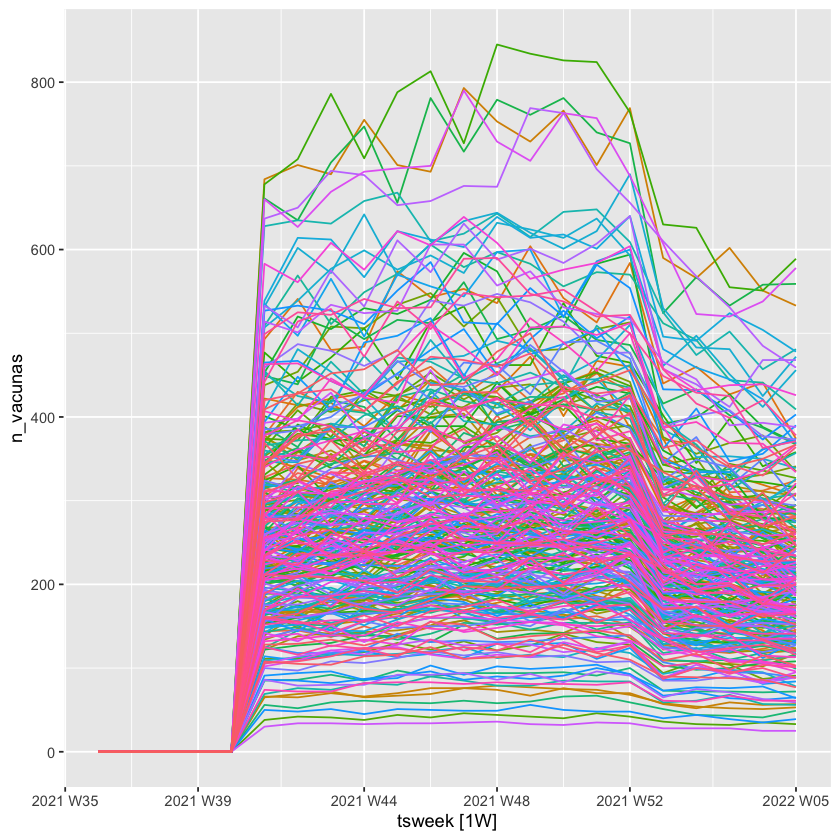

In [3]:

tsdata |> 
  group_by(GEOCODIGO) |> 
  autoplot(n_vacunas) +
  theme(legend.position = "none")

### Spot checking

In [4]:
# Sin regresores
# mod_04_ts <- tsdata |> 
#   model(arima = ARIMA(n_vacunas))

mod_04_ts <- tsdata |> 
  model(arima = ARIMA(n_vacunas))

write_rds(mod_04_ts, "mod_04_ts.rds")

mod_04_ts |> coef()
mod_04_ts |> glance() 
mod_04_ts |> filter(GEOCODIGO == "030") |> report()
mod_04_ts |> augment()
mod_04_ts |> accuracy() |> arrange(MAE)

Warning message:
"4 errors (1 unique) encountered for arima
[4] All observations are missing, a model cannot be estimated without data.
"


GEOCODIGO,.model,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
001,arima,ar1,0.8707149,0.09852963,8.837086,1.088626e-08
001,arima,constant,27.8786865,13.16282011,2.117987,4.571020e-02
002,arima,ar1,0.8756490,0.09494508,9.222690,5.152467e-09
002,arima,constant,15.6908325,7.96831555,1.969153,6.165796e-02
003,arima,ar1,0.8900573,0.08887818,10.014351,1.176063e-09
003,arima,constant,22.9777007,11.70394122,1.963245,6.238232e-02
004,arima,ar1,0.8792957,0.09479647,9.275617,4.656590e-09
004,arima,constant,18.9786969,9.15780005,2.072408,5.014848e-02
005,arima,ar1,0.8897349,0.08904555,9.991907,1.225074e-09


GEOCODIGO,.model,sigma2,log_lik,AIC,AICc,BIC,ar_roots,ma_roots
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>,<list>
001,arima,6352.667,-127.2009,260.4017,261.7351,263.6749,1.148482+0i,
002,arima,2315.007,-116.1149,238.2299,239.5632,241.5030,1.14201+0i,
003,arima,5406.924,-125.5036,257.0072,258.3406,260.2804,1.123523+0i,
004,arima,3182.496,-119.6296,245.2592,246.5926,248.5324,1.137274+0i,
005,arima,4568.519,-123.6488,253.2977,254.6310,256.5708,1.12393+0i,
006,arima,2839.143,-113.2859,228.5718,228.7824,229.6163,,
007,arima,1098.238,-107.9009,221.8018,223.1351,225.0749,1.145991+0i,
008,arima,4619.917,-123.7713,253.5426,254.8759,256.8157,1.124107+0i,
009,arima,1494.381,-106.5471,215.0942,215.3048,216.1388,,


Series: n_vacunas 
Model: ARIMA(1,0,0) w/ mean 

Coefficients:
         ar1  constant
      0.8675   56.8609
s.e.  0.0996   26.9507

sigma^2 estimated as 26163:  log likelihood=-142.76
AIC=291.52   AICc=292.85   BIC=294.79


GEOCODIGO,.model,tsweek,n_vacunas,.fitted,.resid,.innov
<chr>,<chr>,<week>,<dbl>,<dbl>,<dbl>,<dbl>
001,arima,2021 W36,0,106.04784,-106.047837,-106.047837
001,arima,2021 W37,0,27.87869,-27.878687,-27.878687
001,arima,2021 W38,0,27.87869,-27.878687,-27.878687
001,arima,2021 W39,0,27.87869,-27.878687,-27.878687
001,arima,2021 W40,0,27.87869,-27.878687,-27.878687
001,arima,2021 W41,328,27.87869,300.121313,300.121313
001,arima,2021 W42,344,313.47316,30.526837,30.526837
001,arima,2021 W43,353,327.40460,25.595399,25.595399
001,arima,2021 W44,371,335.24103,35.758966,35.758966


GEOCODIGO,.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
222,arima,Training,1.262054,6.652044,3.557510,-Inf,Inf,NaN,NaN,0.094843574
080,arima,Training,1.591976,8.630690,4.654770,-Inf,Inf,NaN,NaN,0.039957664
182,arima,Training,1.827213,11.147013,6.407589,-Inf,Inf,NaN,NaN,-0.072028406
118,arima,Training,2.253671,12.534624,7.032271,-Inf,Inf,NaN,NaN,-0.042810812
036,arima,Training,2.640609,14.258804,7.484377,-Inf,Inf,NaN,NaN,0.065832323
033,arima,Training,2.675558,14.760815,8.228880,-Inf,Inf,NaN,NaN,-0.044370082
256,arima,Training,2.965786,16.599597,9.142424,-Inf,Inf,NaN,NaN,-0.044755341
137,arima,Training,2.926191,16.215838,9.594555,-Inf,Inf,NaN,NaN,0.034526490
121,arima,Training,3.442341,19.303507,10.743876,-Inf,Inf,NaN,NaN,-0.052497490


### Escenario

In [5]:

actual <- data_04_completo |>
  filter(ano == 2022, semana < 45, semana >= 35) |>
  select(GEOCODIGO, campana, ano, semana, n_vacunas, tuits_gripe, interes_gripe)

write_csv(actual, "ACTUAL_TS.csv")

### Modelo campaña actual

In [6]:

actualts <- actual |>
  mutate(tsweek = make_yearweek(ano, semana)) |>
  as_tsibble(key = GEOCODIGO, index = tsweek) |>
  fill_gaps()

mod_04_ts <- actualts |>  
  model(arima = ARIMA(n_vacunas))

Warning message:
"4 errors (1 unique) encountered for arima
[4] All observations are missing, a model cannot be estimated without data.
"


### Predicción

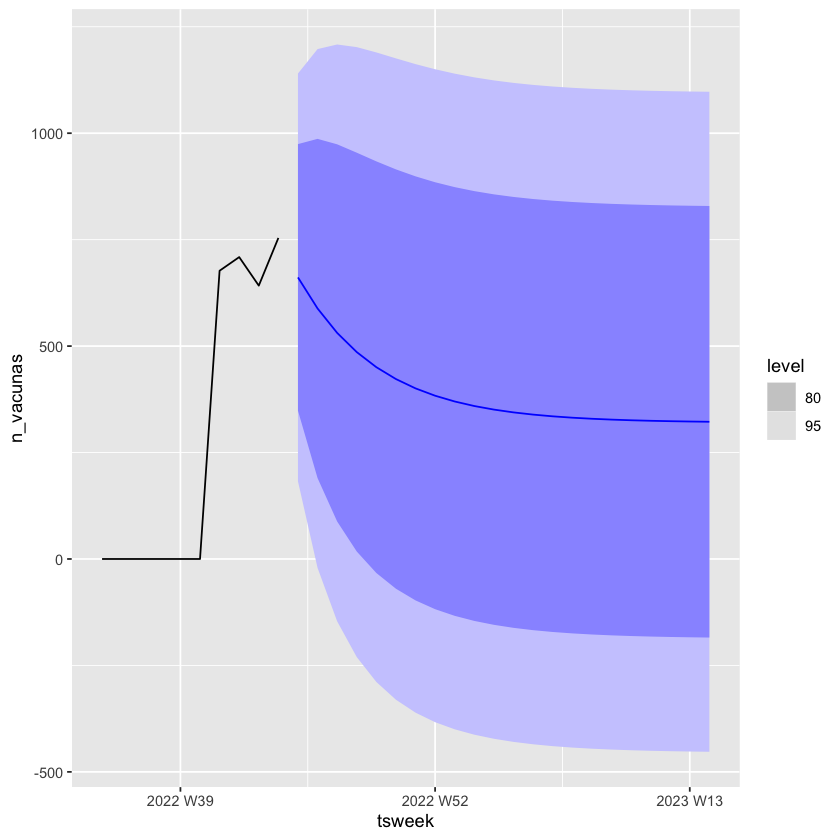

In [7]:


## Esto lo cogerá el notebook de las variables:

SEMANA_INICIO <- 36
SEMANA_FIN <- 5

h <- as.numeric(
  make_yearweek(min(actualts$ano, na.rm = TRUE) + 1, SEMANA_FIN) - min(actualts$tsweek, na.rm = TRUE))

prediction <- mod_04_ts |> forecast(h = h)


prediction |> filter(GEOCODIGO == "030") |> autoplot(actualts)
